In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# pred_path = "/projects/mhpi/leoglonz/dPLT/output/29apr2/ls_aggregate/train2012-2020/no_multi/CudnnLstmModel_E3_R12_B5_H256_n4_noLn_noWU_111111/TerzaghiMultiLayer/NseBatchLoss/stat/test2012-2020_Ep3/v_disp.npy"
# obs_path = "/projects/mhpi/leoglonz/dPLT/output/29apr2/ls_aggregate/train2012-2020/no_multi/CudnnLstmModel_E3_R12_B5_H256_n4_noLn_noWU_111111/TerzaghiMultiLayer/NseBatchLoss/stat/test2012-2020_Ep3/v_disp_obs.npy"
path = '/projects/mhpi/leoglonz/data/extracted/land_subsidence/ls_train'

pred_path = '/projects/mhpi/leoglonz/dPLT/output/may6_2/ls_aggregate/train2012-2020/no_multi/CudnnLstmModel_E10_R24_B5_H256_n4_noLn_noWU_111111/TerzaghiMultiLayer/NseBatchLoss/stat/test2012-2020_Ep10/v_disp.npy'
obs_path = '/projects/mhpi/leoglonz/dPLT/output/may6_2/ls_aggregate/train2012-2020/no_multi/CudnnLstmModel_E10_R24_B5_H256_n4_noLn_noWU_111111/TerzaghiMultiLayer/NseBatchLoss/stat/test2012-2020_Ep10/v_disp_obs.npy'


with open(path, 'rb') as f:
    data = pickle.load(f)
target = data['target']


pred = np.load(pred_path) # Predicted land subsidence (daily deltas)
obs = np.load(obs_path)    # Observed land subsidence (daily deltas)
print("Predicted shape:", pred.shape)  # [months, stations]
print("Observed shape:", obs.shape)    # [months, stations]

# Compute cumulative subsidence
cumulative_pred = np.cumsum(pred, axis=0)  # Cumulative predicted subsidence
cumulative_obs = np.cumsum(obs, axis=0)    # Cumulative observed subsidence

# Extract dimensions
num_days, num_stations = pred.shape

# Generate time axis (assuming one month per row)
time_days = np.arange(num_days)

Predicted shape: (88, 16)
Observed shape: (88, 16)


<>:47: SyntaxWarning: invalid escape sequence '\D'
<>:47: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_4004330/2242875760.py:47: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f"$\Delta$ Subsidence and Cumulative Subsidence Over Time (Station {STATION_IDX})", fontsize=16)


Station 6 — RMSE: 7.667 mm, R²: -0.296


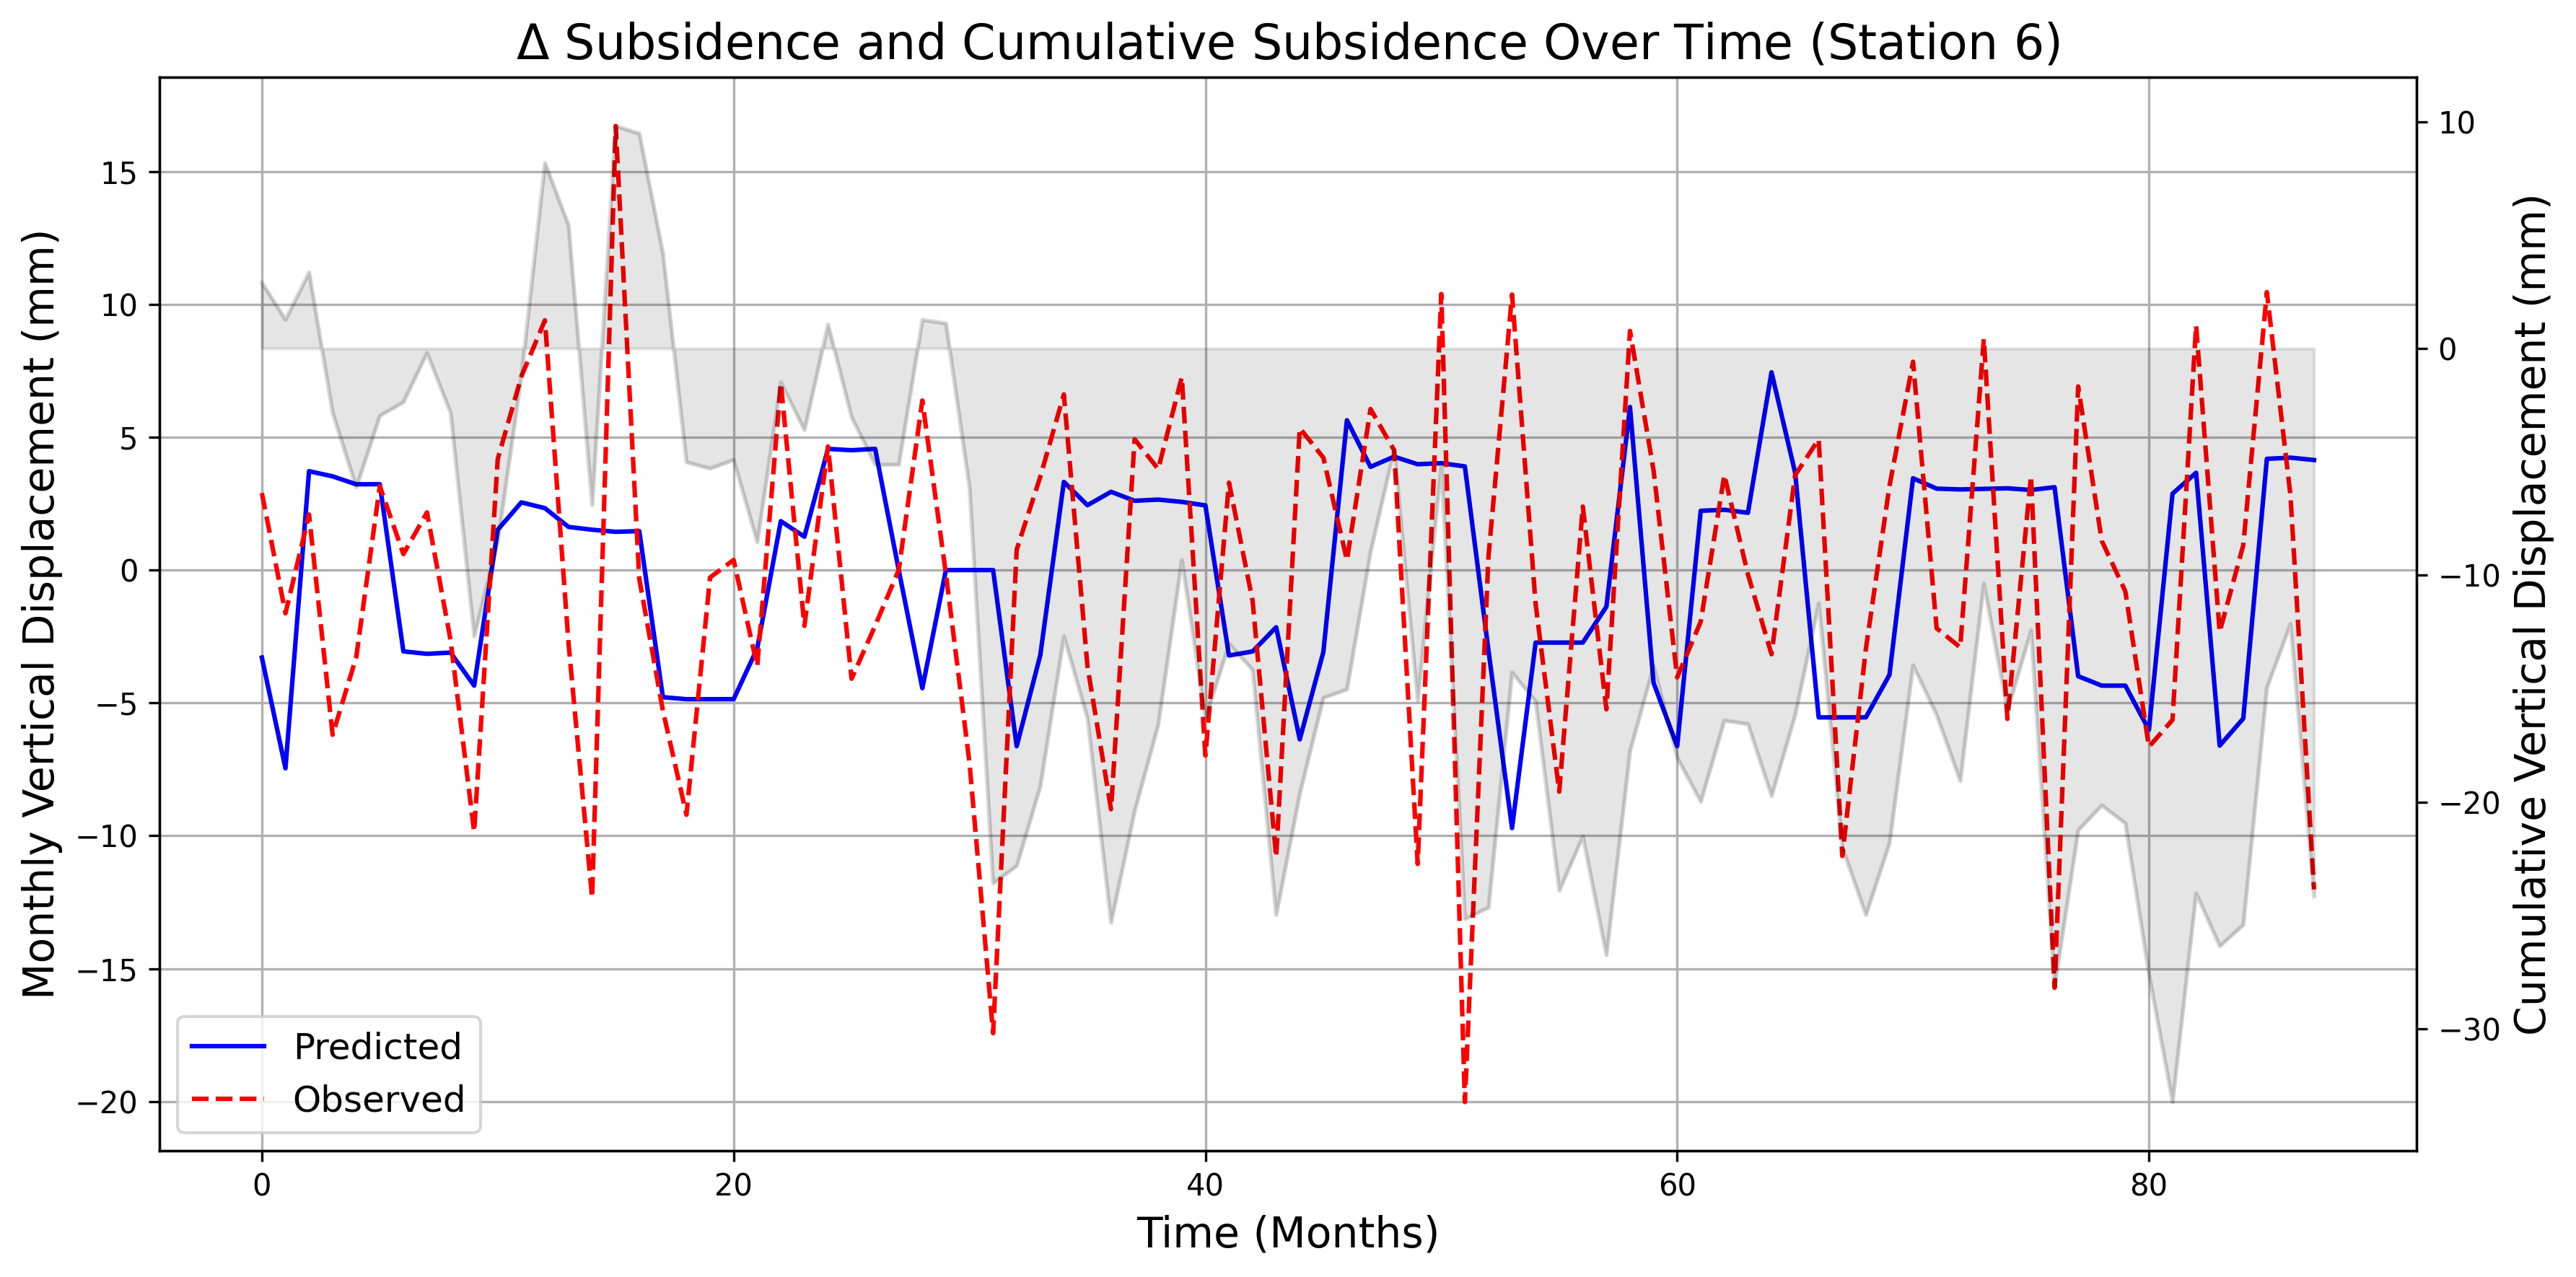

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

STATION_IDX = 6

def main(idx):
    # Choose a specific station to plot
    pred_station = pred[:, idx] * 100 # monthly predicted subsidence
    obs_station = obs[:, idx]         # monthly observed subsidence
    cumulative_pred_station = cumulative_pred[:, idx]  # Cumulative predicted
    cumulative_obs_station = cumulative_obs[:, idx]    # Cumulative observed

    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(obs_station, pred_station))
    r2 = r2_score(obs_station, pred_station)
    print(f"Station {idx} — RMSE: {rmse:.3f} mm, R²: {r2:.3f}")

    # Create the twin-axis plot
    fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

    # Plot the monthly subsidence on the LHS y-axis
    ax1.plot(time_days, pred_station, label="Predicted", color="blue", linestyle="-")
    ax1.plot(time_days, obs_station, label="Observed", color="red", linestyle="--")
    ax1.set_xlabel("Time (Months)", fontsize=14)
    ax1.set_ylabel("Monthly Vertical Displacement (mm)", fontsize=14)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(loc="lower left", fontsize=12)
    ax1.grid(True)

    # Create a second y-axis for cumulative subsidence
    ax2 = ax1.twinx()
    ax2.plot(time_days, cumulative_obs_station, label="Cumulative Observed", color="black", alpha=0.1)
    ax2.set_ylabel("Cumulative Vertical Displacement (mm)", fontsize=14)
    ax2.tick_params(axis='y', labelcolor='black')

    # Shade the cumulative observed curve
    ax2.fill_between(
        time_days,
        cumulative_obs_station,
        color="black",
        alpha=0.1,
        label="Cumulative Observed (Shaded)"
    )

    # Add a title including metrics
    plt.title(f"$\Delta$ Subsidence and Cumulative Subsidence Over Time (Station {STATION_IDX})", fontsize=16)

    # Show the plot
    plt.tight_layout()
    plt.show()

main(STATION_IDX)


No dPL: Station 6 — RMSE: 7.255 mm, R²: -0.161
w/ dPL: 